In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBRegressor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [146]:
df = pd.read_csv('ParisHousingClass.csv')

In [147]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [148]:
df.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4,Basic


In [149]:
df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [151]:
df.shape

(10000, 18)

In [152]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)
print(df.dtypes)

Numerical variables: ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']
Categorical variables: ['category']
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object


In [153]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 1
Number of numerical variables: 17


In [154]:
# Unique values for categorical features
print(df.select_dtypes(include=['object']).nunique())

category    2
dtype: int64


In [155]:
# Get the list of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Create a DataFrame containing counts of unique values for each categorical column
cat_df = (df[cat_cols]
          .melt(var_name='column', value_name='value')
          .groupby(['column', 'value'])
          .size()
          .reset_index(name='count')
          .sort_values(by=['column', 'count'], ascending=[True, False]))

# Display summary statistics of categorical variables
display(df[cat_cols].describe())

# Display counts of unique values for each categorical column
display(cat_df)


,category
count,10000
unique,2
top,Basic
freq,8735


,column,value,count
0,category,Basic,8735
1,category,Luxury,1265


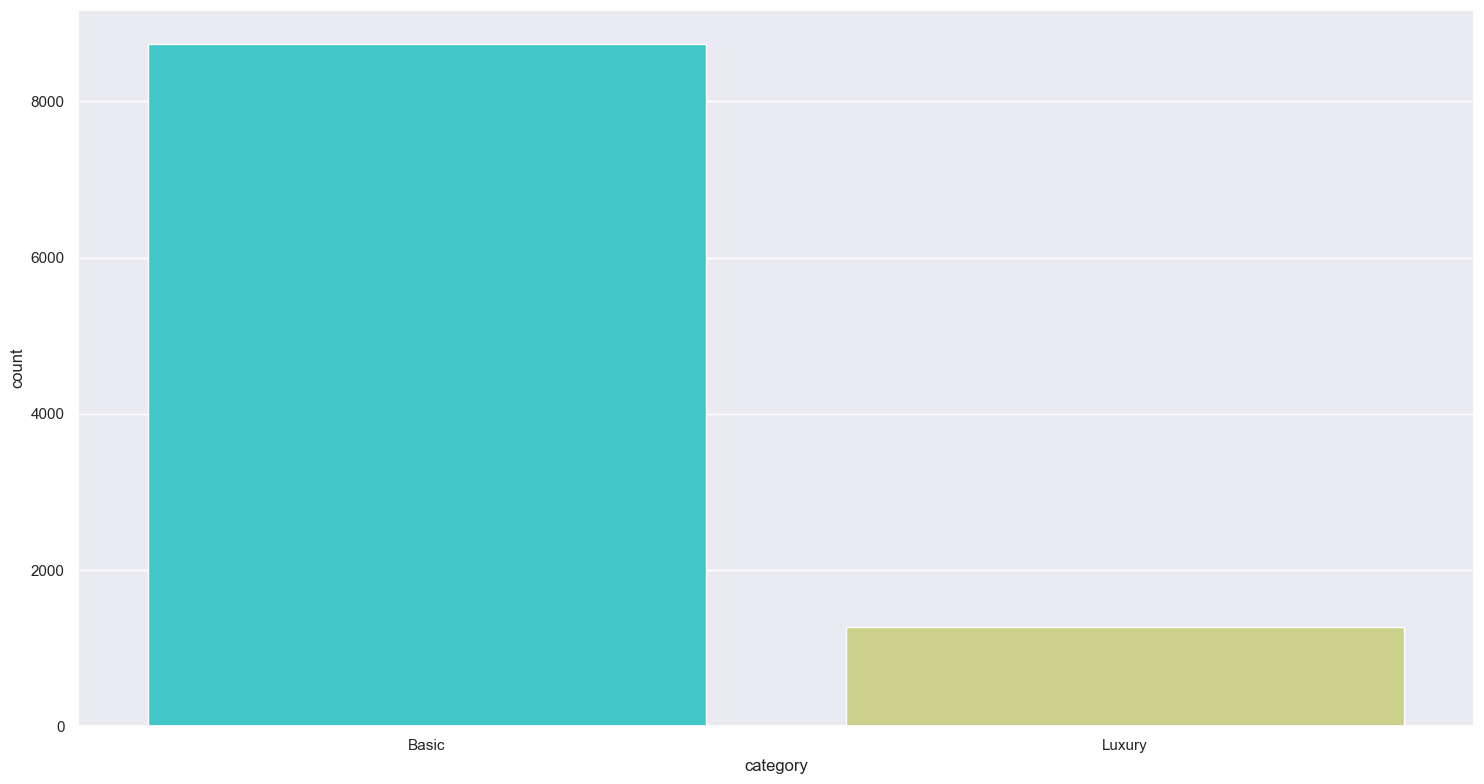

In [156]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    sns.countplot(x=column, data=df,palette='rainbow')
    plt.tight_layout()
    plt.show()

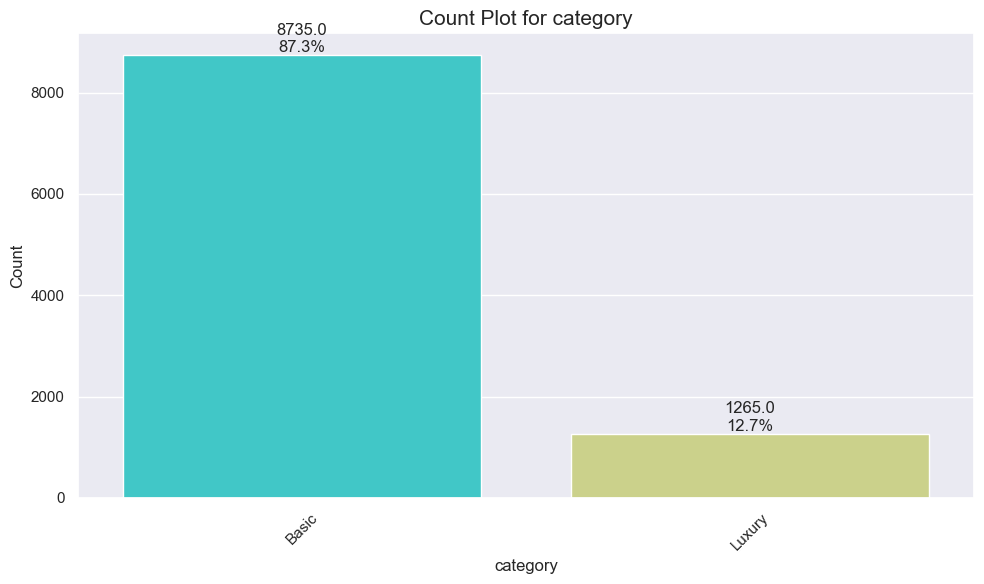

In [157]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df,palette='rainbow')
    
    # Add count and percentage annotations to each bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='bottom')
    
    plt.title(f'Count Plot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

In [158]:
catcol = []
numcol = []

for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)

In [159]:
print("Categorical Columns:",catcol)
print("Numerical Columns:", numcol)

Categorical Columns: ['category']
Numerical Columns: ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']


In [160]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in catcol:
    df[col] = encoder.fit_transform(df[col])

In [161]:
x = df.drop('price',axis=1)
y = df['price']

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle = False)

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [164]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình Lasso
lasso = Lasso()

# Xác định danh sách các giá trị alpha cần thử nghiệm
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Thiết lập GridSearchCV
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Lấy giá trị alpha tốt nhất
best_alpha = grid_search.best_params_['alpha']
print("Best alpha for Lasso: ", best_alpha)

# Khởi tạo lại mô hình Lasso với alpha tốt nhất
model = Lasso(alpha=best_alpha)
model.fit(x_train, y_train)


Best alpha for Lasso:  10


Lasso(alpha=10)

In [165]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


In [166]:
#x = df.drop('price',axis=1)
#y = df['price']

In [167]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (8000, 17) (8000,)
Testing set shape: (2000, 17) (2000,)


In [168]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [169]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (8000, 17) (8000,)
Testing set shape: (2000, 17) (2000,)


In [170]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [171]:
models = {
            "Linear Regression" : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            #"k-Neighbors Regression" : KNeighborsRegressor(),
            #"Decision Tree" : DecisionTreeRegressor(),
            #"Random Forest Regressor" : RandomForestRegressor(n_estimators = 100, random_state = 0),
            #"AdaBoost Regressor" :AdaBoostRegressor(),
            #"XGBRegressor" : XGBRegressor()
        }

In [172]:
score_text=""
for i in range(len(models)):
            model = list(models.values())[i]
            model.fit(x_train,y_train)

            #Make prediction:
            y_train_pred = model.predict(x_train)
            y_test_pred = model.predict(x_test)

            #Evaluate Train and Test dataset :

            model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
            model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
            model_name = list(models.keys())[i]
           
            print(model_name)

            print("Model Performance for Training set :")

            print('Root Mean Squared Error :',model_train_rmse)
            print("Mean Absolute Error : ", model_train_mae)
            print("R2 Score : ", model_train_r2)

            print("----------------------------------------------------")
            
            print("Model Performance for Testing set :")

            print('Root Mean Squared Error : ', model_test_rmse)
            print('Mean Absolute Error :  ',{model_test_mae})
            print('R2 Score : ', {model_test_r2})
            print()

Linear Regression
Model Performance for Training set :
Root Mean Squared Error : 1891.9830109380616
Mean Absolute Error :  1475.2248252974218
R2 Score :  0.9999995670728727
----------------------------------------------------
Model Performance for Testing set :
Root Mean Squared Error :  1918.2609259134094
Mean Absolute Error :   {1490.0025411044767}
R2 Score :  {0.9999995577018618}

Lasso
Model Performance for Training set :
Root Mean Squared Error : 1891.9885880997997
Mean Absolute Error :  1475.232347870194
R2 Score :  0.9999995670703203
----------------------------------------------------
Model Performance for Testing set :
Root Mean Squared Error :  1918.1473981038982
Mean Absolute Error :   {1489.969962316447}
R2 Score :  {0.9999995577542129}

Ridge
Model Performance for Training set :
Root Mean Squared Error : 1891.9834619974226
Mean Absolute Error :  1475.2256116233561
R2 Score :  0.9999995670726662
----------------------------------------------------
Model Performance for Test

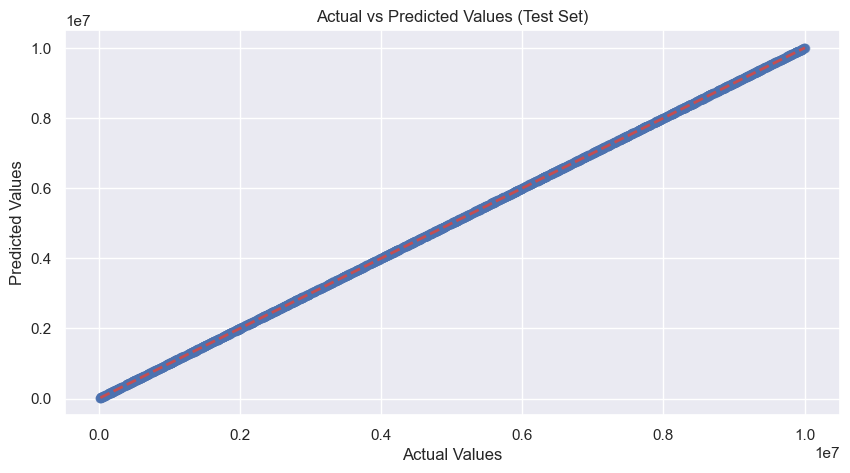

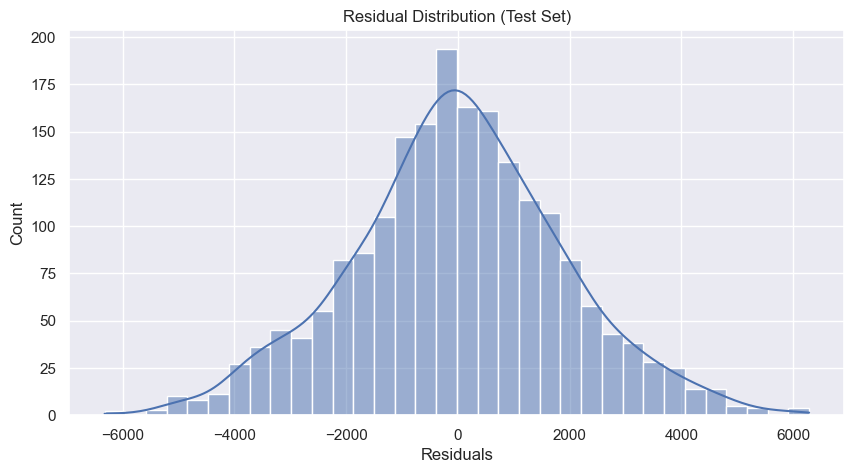

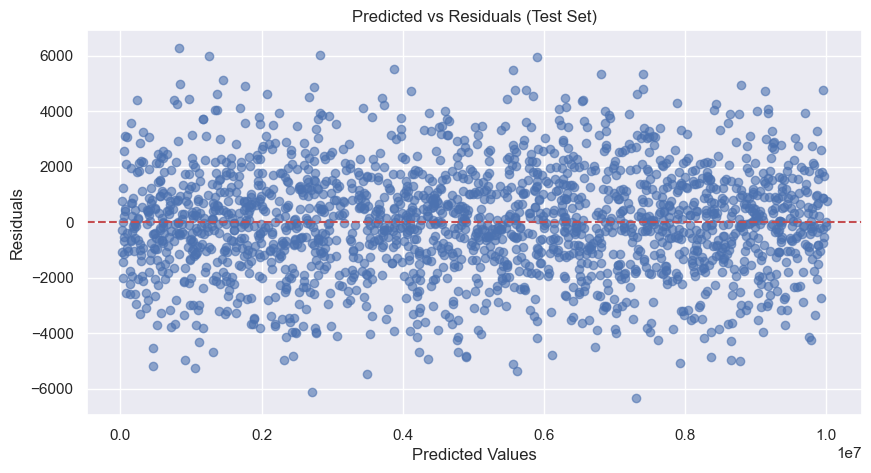

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the model you want to use for plotting, e.g., "Linear Regression"
model = LinearRegression()    # Replace with any specific model you want
model.fit(x_train, y_train)  # Ensure the model is trained

# Generate predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# 1. Actual vs Predicted Plot (Testing Set)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Set)")
plt.show()

# 2. Residual Plot (Testing Set)
plt.figure(figsize=(10, 5))
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution (Test Set)")
plt.show()

# 3. Predicted vs Residuals Plot (Testing Set)
plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals (Test Set)")
plt.show()
